# Predicting Customer Churn Using Machine Learning

![Telecom Image](https://miro.medium.com/v2/resize:fit:1024/1*WZdoYPpmiIk1AcPQ1YHWug.png)


### Overveiw
In the telecom world, losing customers is one of the most expensive problems. Companies spend millions attracting new customers, but many of them silently leave without warning. Most telecom companies react after customers cancel — instead of predicting and preventing churn earlier.

### The goal

We developed a Logistic Regression model to predict whether a customer will churn or stay. Using features such as tenure, monthly charges, total charges, contract type, internet service, and other customer details, the model identifies patterns that indicate a higher risk of churn. This helps the company take proactive measures to retain customers.


# Section A - Exploraory Data Analysis (EDA)



First we load our data

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data_telco.csv')


A.1 – Basic Dataset Overview

In [187]:
df.shape

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


A.2 – Checking Missing Values

In [188]:
df.isnull()
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


A.3 – Univariate Analysis

In [189]:
print(df['gender'].value_counts())
print(df['Contract'].value_counts())
print(df['MonthlyCharges'].describe())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


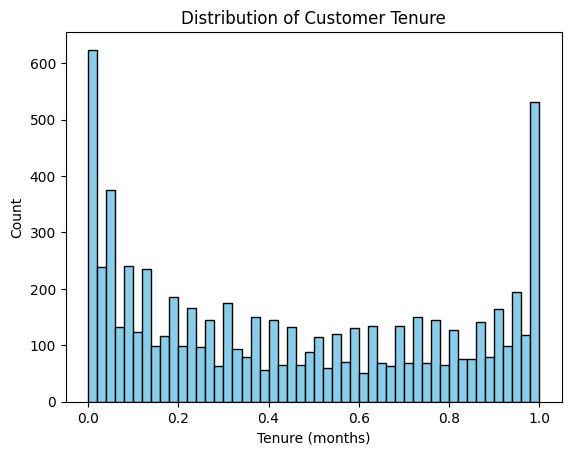

In [207]:
plt.hist(df['tenure'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


A.4 – Bivariate Analysis

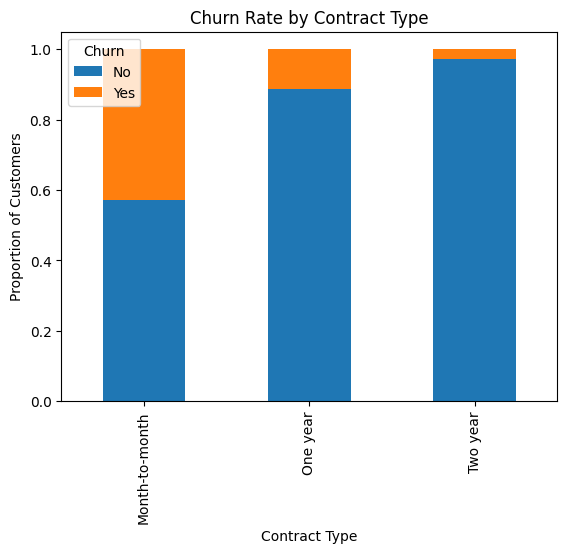

In [191]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Proportion of Customers")
plt.legend(title="Churn")
plt.show()


A.5 — Required Visualizations

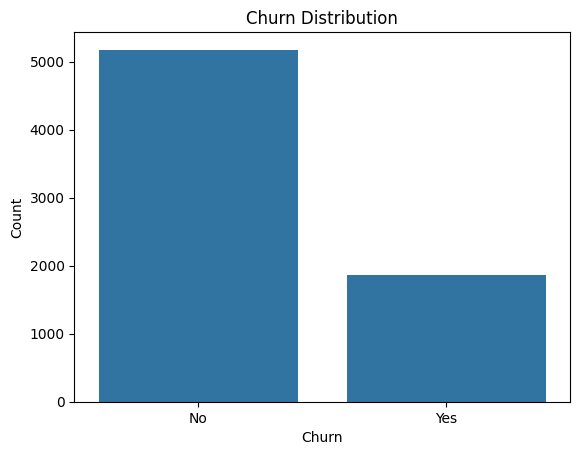

In [192]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


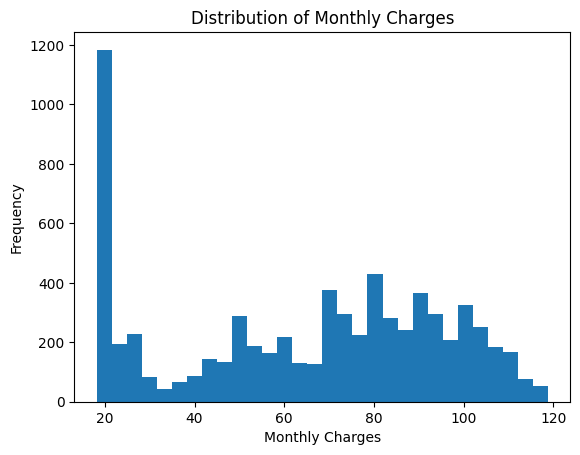

In [194]:
plt.hist(df['MonthlyCharges'], bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()


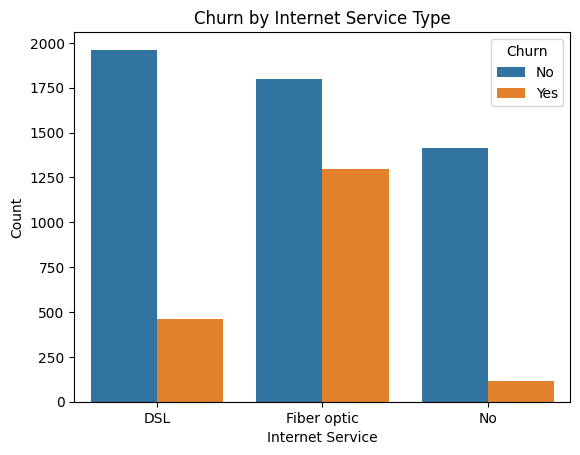

In [195]:
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()


# Section B – Data Analysis and Preparation

B.1 — Handling Missing Values

In [196]:
df.isnull().sum()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


B.2 — Encoding Categorical Features

In [197]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])



B.3 – Feature Scaling

In [198]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


B.4 – Final Clean Dataset Check

In [199]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.462803,0.261149,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.299403,0.261397,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.171642,0.044245,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.518408,0.159090,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.712438,0.434780,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000


# SECTION C — Simple Machine Learning Model


C.1 — Define the Problem Type

Our target column is:

Churn


This column indicates whether a customer left the company.

0 = No churn

1 = Yes churn

Because we are predicting a category Yes/No, this is a:

Classification Problem

We will use Logistic Regression, a simple and commonly used model for binary classification.

C.2 – Train/Test Split

In [200]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']


In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


C.3 – Choose and Train a Model

In [202]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [203]:
y_pred = model.predict(X_test)


In [204]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.815471965933286
Confusion Matrix:
 [[933 103]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

